## Imports

In [60]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/home/irtimid/Documents/travail/programmes/le2m-v2.1/extractor/")
import extractor

## Parts in the database

In [61]:
datafile = sqlite3.connect("data.sqlite")
parts = extractor.get_parts(datafile)
parts

[u'parties',
 u'sessions',
 u'partie_PublicGoodGame',
 u'joueurs',
 u'partie_base',
 u'partie_questionnaireFinal',
 u'parties_joueurs__joueurs_parties',
 u'partie_PublicGoodGame_repetitions']

## The data

In [80]:
data = extractor.get_partdata(datafile, "partie_PublicGoodGameSolidarity_repetitions")
data.head()

,session,joueur,id,partie_partie_id,PGG_period,PGG_treatment,PGG_group,PGG_indiv,PGG_public,PGG_publicgroup,PGG_decisiontime,PGG_indivpayoff,PGG_publicpayoff,PGG_periodpayoff,PGG_cumulativepayoff
0,201509181926,201509181926_j_0,91,37,1,0,201509181926_g_0,12,8,27,0,12,13.5,25.5,25.5
1,201509181926,201509181926_j_0,95,37,2,0,201509181926_g_0,11,9,38,0,11,19.0,30.0,55.5
2,201509181926,201509181926_j_0,99,37,3,0,201509181926_g_0,1,19,38,0,1,19.0,20.0,75.5
3,201509181926,201509181926_j_0,103,37,4,0,201509181926_g_0,14,6,32,0,14,16.0,30.0,105.5
4,201509181926,201509181926_j_0,107,37,5,0,201509181926_g_0,9,11,44,0,9,22.0,31.0,136.5


## Averages by group

In [81]:
datagroup = data.groupby([data.PGGS_treatment, data.PGGS_group]).mean()
datagroup["PGGS_public"]

PGG_treatment  PGG_group       
0              201509181926_g_0     9.875
               201509190955_g_0    11.425
               201509190955_g_1    10.075
               201509190955_g_2     9.825
               201509190955_g_3     9.975
               201509190955_g_4    10.850
Name: PGG_public, dtype: float64

## Evolution over time

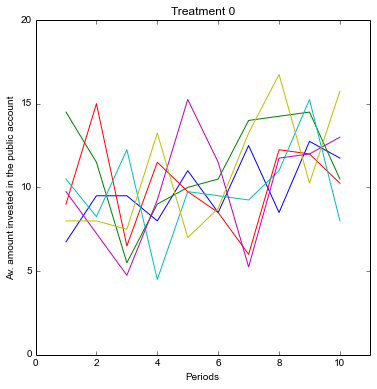

In [88]:
datagroupevol = data.groupby([data.PGGS_treatment, data.PGGS_group, data.PGGS_period]).mean()
treatments, groups, periods = datagroupevol.index.levels
fig, graph = plt.subplots(len(treatments), figsize=(6, 6))
for c, t in enumerate(treatments):
    gr = graph[c] if len(treatments) > 1 else graph
    gr.set_xlim(0, len(periods) + 1)
    gr.set_xlabel("Periods")
    gr.set_ylim(0, 20)
    gr.set_ylabel("Av. amount invested in the public account")
    gr.set_title("Treatment {}".format(c))
    for g in groups:
        temp = datagroupevol.ix[t].ix[g]["PGGS_public"]
        gr.plot(periods, temp)

## Averages of each player in each group

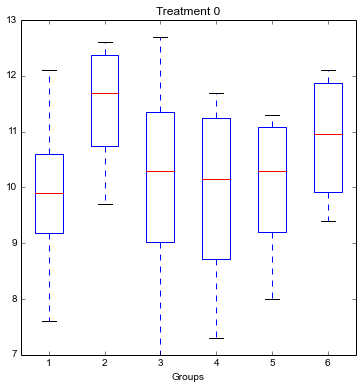

In [125]:
avplayer = data.groupby([data.PGGS_treatment, data.PGGS_group, data.joueur]).mean()
treatments, groups, players = avplayer.index.levels
fig, graph = plt.subplots(len(treatments), figsize=(6, 6))
for c, t in enumerate(treatments):
    gr = graph[c] if len(treatments) > 1 else graph
    temp = [avplayer.ix[t].ix[g]["PGGS_public"] for g in groups]
    gr.boxplot(temp)
    gr.set_title("Treatment {}".format(c))
    gr.set_xlabel("Groups")

## frequency of each amount in the public account, by group

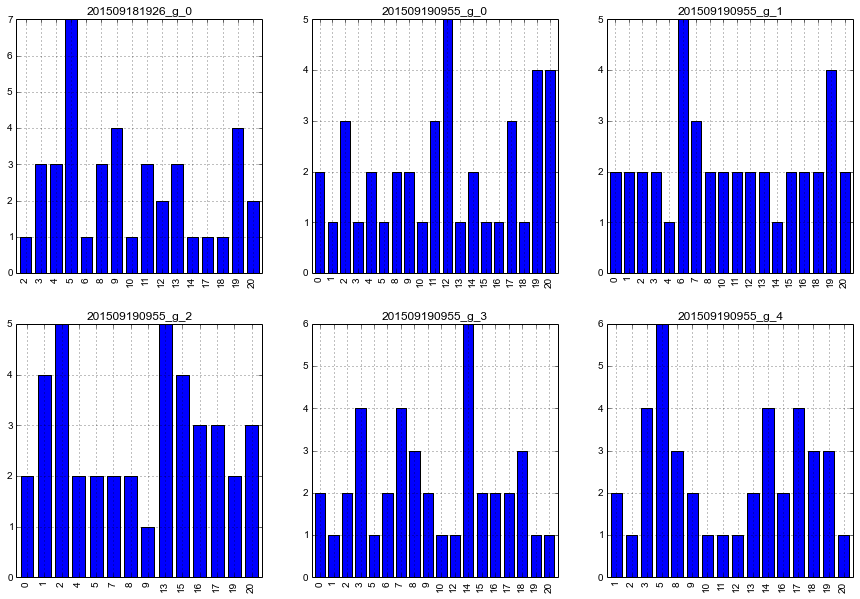

In [179]:
datafreq = data.groupby([data.PGG_treatment, data.PGG_group])["PGGS_public"].value_counts(sort=False)
datafreq = pd.DataFrame(datafreq)
treatments, groups, amounts = datafreq.index.levels
fig = plt.figure(figsize=(15,10))
for c, g in enumerate(groups):
    temp = datafreq.ix[t].ix[g]
    graph = fig.add_subplot(2, 3, c+1)
    temp.plot(kind="bar", ax=graph)
    graph.set_title("{}".format(g))
    graph.legend().set_visible(False)